<a href="https://colab.research.google.com/github/sameersahu473/rp/blob/main/coloured_nose_250.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from scipy.misc import face
from scipy.signal import wiener
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
dt = pd.read_excel("data_colored_noise.xlsx")

In [7]:
dt.head()

,time,clean_signal,colored_signal
0,0.00,1.000000,0.354164
1,0.08,0.612936,0.934113
2,0.16,-0.232745,0.417276
3,0.24,-0.888523,-0.712652
4,0.32,-0.860166,-0.918073


In [8]:
noise = dt["colored_signal"]
tm = dt["time"]
clean = dt["clean_signal"]

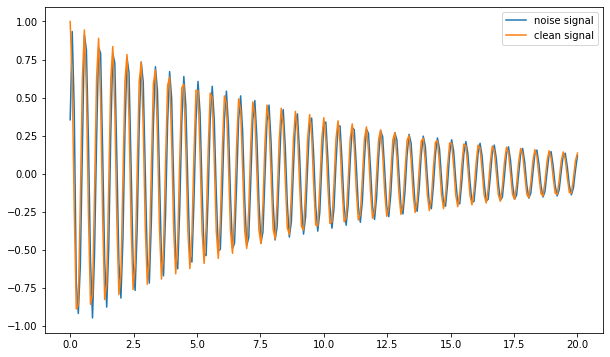

In [9]:


plt.figure(figsize=(10, 6))
plt.plot(tm,noise, label='noise signal')
plt.plot(tm,clean, label='clean signal')

plt.legend(loc='best')
plt.show()


Using weiner filter


In [10]:
!pip install astroML
from astroML.filters import wiener_filter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 134 kB 5.1 MB/s 


https://www.astroml.org/book_figures_1ed/chapter10/fig_wiener_filter.html

In [11]:
h_smooth, PSD, P_S, P_N, Phi = wiener_filter(tm, noise,return_PSDs=True)

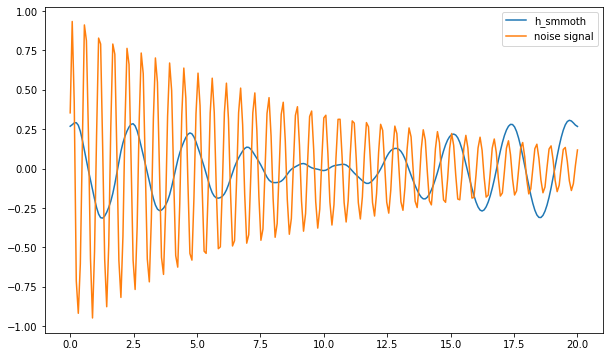

In [12]:

plt.figure(figsize=(10, 6))
plt.plot(tm,h_smooth,label = "h_smmoth")
plt.plot(tm,noise, label = "noise signal")




plt.legend(loc='best')
plt.show()

In [13]:
res = "\n".join("{} {}".format(x, y) for x, y in zip(clean, h_smooth))

In [14]:
print(res)

1.0 0.2690540176540468
0.61293645507449 0.2789042280309836
-0.232745124136721 0.29009061567726785
-0.888523453545112 0.2919490107498213
-0.860165996460362 0.2753106729635912
-0.180033988148443 0.2369681355059318
0.625814067921961 0.18099290150844405
0.944344878931058 0.11603009416894258
0.541766083402566 0.050323941024133144
-0.265219229629636 -0.012223312664681275
-0.858291872609368 -0.07240565415876807
-0.791147265950322 -0.13252007900912888
-0.125177520850641 -0.19222433674944053
0.625137906838347 -0.24666604302329395
0.889530243226272 -0.28832497522692613
0.475235735007527 -0.31118135181537915
-0.292832400893931 -0.31408241043600077
-0.826667777757217 -0.3008247972412549
-0.72520526852853 -0.2769781049340433
-0.0754631482861739 -0.24591973028438338
0.62118608820838 -0.20708395965044682
0.835760543581875 -0.15767711438083737
0.413210009504265 -0.09644070894722989
-0.315951827109497 -0.026495696223622356
-0.793968045039057 0.04496961915777769
-0.662367093057486 0.10998619892088961
-0

In [15]:
from sklearn import metrics
print(metrics.mean_squared_error(clean,h_smooth))

0.15061693819258135


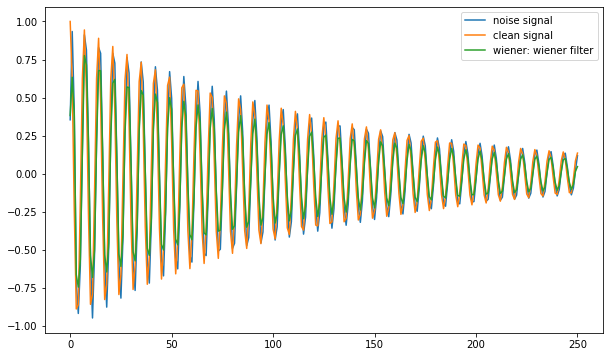

In [16]:
from scipy import signal
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(noise, label='noise signal')
plt.plot(clean, label='clean signal')
plt.plot(signal.wiener(noise), label='wiener: wiener filter')

plt.legend(loc='best')
plt.show()

In [17]:
res = "\n".join("{} {}".format(x, y) for x, y in zip(clean, signal.wiener(noise)))

In [18]:
print(res)

1.0 0.3823550116180901
0.61293645507449 0.6333009877458546
-0.232745124136721 0.3932751130730284
-0.888523453545112 -0.6630003539911201
-0.860165996460362 -0.7449348055365009
-0.180033988148443 -0.5636963162750234
0.625814067921961 0.13698371847062707
0.944344878931058 0.775948004909823
0.541766083402566 0.71512177676165
-0.265219229629636 0.2059869007037114
-0.858291872609368 -0.5372060288110855
-0.791147265950322 -0.6812230748913164
-0.125177520850641 -0.5011028538175658
0.625137906838347 0.20305143169796458
0.889530243226272 0.6769357258965003
0.475235735007527 0.6769786330998254
-0.292832400893931 0.1377049962590032
-0.826667777757217 -0.5327135399749037
-0.72520526852853 -0.645430352029126
-0.0754631482861739 -0.45559643948081924
0.62118608820838 0.2436882392822985
0.835760543581875 0.5947256394070984
0.413210009504265 0.6192365188972727
-0.315951827109497 0.09572590883443616
-0.793968045039057 -0.5280870683288088
-0.662367093057486 -0.609540695562749
-0.0306122315794795 -0.399625

In [19]:

from sklearn import metrics
print(metrics.mean_squared_error(clean,signal.wiener(noise)))

0.032556570243143707


In [20]:
len(noise)

251

In [21]:
noise_train = noise[:200]
noise_test = noise[200:]

clean_train = clean[:200]
clean_test = clean[200:]

using knn regressor

In [22]:
from sklearn.neighbors import KNeighborsRegressor
clf = KNeighborsRegressor(n_neighbors=100, weights='uniform')

In [23]:
clf.fit(noise_train.values.reshape(-1,1), clean_train)

KNeighborsRegressor(n_neighbors=100)

In [24]:
clean_pred = clf.predict(noise_test.values.reshape(-1,1))

In [25]:
res = "\n".join("{} {}".format(x, y) for x, y in zip(clean_test, clean_pred))

In [26]:
print(res)

0.0623894551654745 -0.05761787343617608
0.188016929132958 0.13803574927326537
0.169085692761789 0.16240194331083216
0.0222449736578107 0.1366142478274025
-0.139132339083269 -0.060588536199485066
-0.192450451718399 -0.11926160135707024
-0.0989958593124771 -0.10994580754607963
0.0680394051449659 -0.044161062619964386
0.180832193311629 0.13803574927326537
0.154717849620076 0.15836401176317758
0.0117025187822587 0.12853527249352656
-0.137916261955635 -0.06443081961852218
-0.180584577847509 -0.10777211502000208
-0.0856465807035094 -0.10456960067530424
0.072726393509069 -0.03921405769361983
0.17344045559524 0.13803574927326537
0.141043925296737 0.1524962765434376
0.00221443640823859 0.12730247125493702
-0.136090562608254 -0.06443081961852216
-0.169009021396261 -0.10994580754607963
-0.0732531402359873 -0.0972342533171199
0.0765273550932226 -0.03656713758568295
0.165903228080214 0.13803574927326537
0.128063612130989 0.14869780693851214
-0.00628018635190071 0.08251281264186097
-0.13372960972254

In [27]:
clean_pred = clf.predict(noise.values.reshape(-1,1))

In [28]:
res = "\n".join("{} {}".format(x, y) for x, y in zip(clean, clean_pred))
print(res)

1.0 0.22245590759335335
0.61293645507449 0.2781304317432551
-0.232745124136721 0.26338811262999073
-0.888523453545112 -0.27531951893076323
-0.860165996460362 -0.27531951893076323
-0.180033988148443 -0.27531951893076323
0.625814067921961 0.14129539965680485
0.944344878931058 0.2781304317432551
0.541766083402566 0.2781304317432551
-0.265219229629636 0.16530224774906224
-0.858291872609368 -0.2753195189307632
-0.791147265950322 -0.27531951893076323
-0.125177520850641 -0.27531951893076323
0.625137906838347 0.16240194331083221
0.889530243226272 0.2781304317432551
0.475235735007527 0.278130431743255
-0.292832400893931 0.14129539965680485
-0.826667777757217 -0.27531951893076323
-0.72520526852853 -0.27531951893076323
-0.0754631482861739 -0.27531951893076323
0.62118608820838 0.17633905401618397
0.835760543581875 0.2781304317432551
0.413210009504265 0.2781304317432551
-0.315951827109497 0.12853527249352653
-0.793968045039057 -0.27531951893076323
-0.662367093057486 -0.27531951893076323
-0.03061223

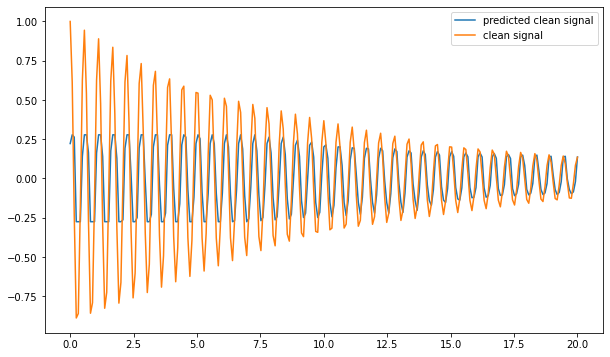

In [29]:
from scipy import signal
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(tm,clean_pred, label='predicted clean signal')
plt.plot(tm,clean, label='clean signal')


plt.legend(loc='best')
plt.show()

In [30]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [31]:
cv = KFold(n_splits=10, random_state=1, shuffle=True)

In [32]:
scores = cross_val_score(clf, noise, clean, scoring='neg_mean_squared_error',
                         cv=cv, n_jobs=-1)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:372: FitFailedWarning: 
10 fits failed out of a total of 10.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_regression.py", line 213, in fit
    return self._fit(X, y)
  File "/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_base.py", line 400, in _fit
    X, y = self._validate_data(X, y, accept_sparse="csr", multi_output=True)
  File "/usr/local/lib

In [33]:
clean_pred = clf.predict(noise.values.reshape(-1,1))

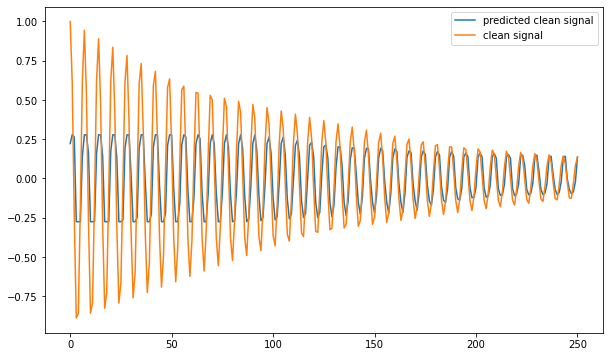

In [34]:
from scipy import signal
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(clean_pred, label='predicted clean signal')
plt.plot(clean, label='clean signal')


plt.legend(loc='best')
plt.show()

In [35]:
import xgboost as xgb
regressor=xgb.XGBRegressor(eval_metric='rmse')

In [36]:
regressor.fit(noise_train.values.reshape(-1,1), clean_train)

[07:46:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(eval_metric='rmse')

In [37]:
clean_pred = regressor.predict(noise.values.reshape(-1,1))

In [38]:
res = "\n".join("{} {}".format(x, y) for x, y in zip(clean, clean_pred))
print(res)

1.0 0.768432080745697
0.61293645507449 0.6628214716911316
-0.232745124136721 -0.01788961887359619
-0.888523453545112 -0.7310276031494141
-0.860165996460362 -0.7928793430328369
-0.180033988148443 -0.344795286655426
0.625814067921961 0.31998488306999207
0.944344878931058 0.8510516285896301
0.541766083402566 0.6553618311882019
-0.265219229629636 0.11910983920097351
-0.858291872609368 -0.731827974319458
-0.791147265950322 -0.7861500978469849
-0.125177520850641 -0.35546600818634033
0.625137906838347 0.21155110001564026
0.889530243226272 0.8510516285896301
0.475235735007527 0.6423029899597168
-0.292832400893931 -0.040805935859680176
-0.826667777757217 -0.731827974319458
-0.72520526852853 -0.72151780128479
-0.0754631482861739 -0.30304884910583496
0.62118608820838 0.259301096200943
0.835760543581875 0.7098959684371948
0.413210009504265 0.5708421468734741
-0.315951827109497 -0.07703137397766113
-0.793968045039057 -0.6611517667770386
-0.662367093057486 -0.6720423698425293
-0.0306122315794795 -0.

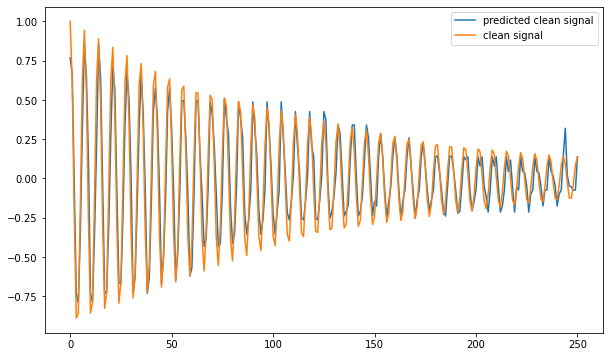

In [39]:
from scipy import signal
from matplotlib import pyplot as plt
plt.figure(figsize=(10, 6))
plt.plot(clean_pred, label='predicted clean signal')
plt.plot(clean, label='clean signal')


plt.legend(loc='best')
plt.show()

In [40]:

from sklearn import metrics
print(metrics.mean_squared_error(clean,clean_pred))

0.016896725904707335
